# WeatherPy
----

### Data Observations
1. Latitude and Max Temperature: as we move closer to the equator, we see max temp increasing for both cities above the equator and cities below the equator

2. Latitude and Wind Speed: there isn't a strong relationship between latitude and wind speed, however we do see some outlier cities further from the equator with high wind speeds

3. Latitude and Humidity: it appears that as we move closer to the equator, cities have tend to have a higher percentage of humidity; however, there isn't a strong enough relationship since there are many cities close the equator with low humidity percentages and many cities far from the equator with high humidity percentages


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from pprint import pprint
from datetime import datetime

# Import API key
from config import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#set base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial' #units to F

#query url set up, that will call everything up
query_url = f"{url}appid={api_keys}&units={units}&q="

#all the list based on date I will grab from api response
lat=[]
temp=[]
hum=[]
wind=[]
cloud=[]
city_list = []
country = []
date = []
lng = []

#sets up the record and sets count for the data retrieval log
record = 1
sets = 1

#begins data retrieval log
print ("Beginning Data Retrieval")
print ("----------------------------------------------------------------")
for city in cities:#goes through each city in cities list
    response = requests.get(query_url + city).json()#request api for each city
    try:
        if (record <= 50):#if statement to keep record count to 50 and below
            print(f"Processing Record {record} of Set {sets} | {city}")
            record = record +1
        else:#if record over 50, we bring it down and we add a set
            sets += 1
            record = 1 
        #we start appending all the list for the final DF
        city_name = response['name']
        city_list.append(city_name)
        lat.append(response['coord']['lat']) 
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lng.append(response['coord']['lon'])
        #this is the date conversion, we will only grab the last date of a sucessful api pull
        date_convert = response['dt']
        current_date = datetime.utcfromtimestamp(date_convert).strftime('%m/%d/%Y')
    except KeyError:#if error, we will skip and print that it was an error
        print("City Not Found. Skipping ...")
     
print("------------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------------")
#log and api pull complete


Beginning Data Retrieval
----------------------------------------------------------------
Processing Record 1 of Set 1 | upata
Processing Record 2 of Set 1 | geraldton
Processing Record 3 of Set 1 | la macarena
Processing Record 4 of Set 1 | lipari
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | petervasara
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | aripuana
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | lolua
City Not Found. Skipping ...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | miles city
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | morro bay
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | narasannapeta
Processing Record 20 of Set 1 | kichera
Processing Record 21 of Set 1 | alexandria
Processing Reco

Processing Record 34 of Set 4 | champerico
Processing Record 35 of Set 4 | bethel
Processing Record 36 of Set 4 | chegdomyn
Processing Record 37 of Set 4 | parati
Processing Record 38 of Set 4 | joshimath
Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | samusu
City Not Found. Skipping ...
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | santa lucia
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | wulanhaote
City Not Found. Skipping ...
Processing Record 46 of Set 4 | sistranda
Processing Record 47 of Set 4 | naantali
Processing Record 48 of Set 4 | orebro
Processing Record 49 of Set 4 | cap-aux-meules
Processing Record 50 of Set 4 | chicama
City Not Found. Skipping ...
Processing Record 1 of Set 5 | saint-francois
Processing Record 2 of Set 5 | grand gaube
Processing Record 3 of Set 5 | zvishavane
Processing Record 4 of Set 5 | hendijan
City Not Found. Skipping ...
Processing Rec

Processing Record 21 of Set 8 | ishigaki
Processing Record 22 of Set 8 | mahadday weyne
City Not Found. Skipping ...
Processing Record 23 of Set 8 | roald
Processing Record 24 of Set 8 | vilyuysk
Processing Record 25 of Set 8 | caravelas
Processing Record 26 of Set 8 | cape coast
Processing Record 27 of Set 8 | saint-joseph
Processing Record 28 of Set 8 | lavrentiya
Processing Record 29 of Set 8 | ituni
City Not Found. Skipping ...
Processing Record 30 of Set 8 | half moon bay
Processing Record 31 of Set 8 | markova
Processing Record 32 of Set 8 | osakarovka
Processing Record 33 of Set 8 | yilan
Processing Record 34 of Set 8 | muskegon
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | hongjiang
Processing Record 38 of Set 8 | teknaf
Processing Record 39 of Set 8 | hay river
Processing Record 40 of Set 8 | bambanglipuro
Processing Record 41 of Set 8 | chirongui
Processing Record 42 of Set 8 | dubbo
Processing Record 43 of S

Processing Record 4 of Set 12 | ponta delgada
Processing Record 5 of Set 12 | longhua
Processing Record 6 of Set 12 | sao felix do xingu
Processing Record 7 of Set 12 | athabasca
Processing Record 8 of Set 12 | morehead
Processing Record 9 of Set 12 | sioux lookout
Processing Record 10 of Set 12 | virginia beach
Processing Record 11 of Set 12 | saint anthony
Processing Record 12 of Set 12 | saryshagan
City Not Found. Skipping ...
Processing Record 13 of Set 12 | gidam
Processing Record 14 of Set 12 | blagoyevo
Processing Record 15 of Set 12 | rocha
Processing Record 16 of Set 12 | vanimo
Processing Record 17 of Set 12 | kalemie
Processing Record 18 of Set 12 | omsukchan
Processing Record 19 of Set 12 | la rioja
Processing Record 20 of Set 12 | ilo
Processing Record 21 of Set 12 | fujin
Processing Record 22 of Set 12 | les cayes
Processing Record 23 of Set 12 | solvychegodsk
Processing Record 24 of Set 12 | vestmannaeyjar
Processing Record 25 of Set 12 | quijingue
Processing Record 26 o

In [7]:
#adds all the list into one dictionary for our final DF
weather_dict = {
    "Cities": city_list,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}
#prints count of all list to make sure list is all same length
print(f"Latitude: {len(lat)}")
print(f"Temp: {len(temp)}")
print(f"Humidity: {len(hum)}")
print(f"Cloudiness: {len(cloud)}")
print(f"Wind Speed: {len(wind)}")
print(f"Total Cities: {len(city_list)}")
print(f"Longitude: {len(lng)}")
print(f"Date Total: {len(date)}")
print(f"Country Total: {len(country)}")


Latitude: 536
Temp: 536
Humidity: 536
Cloudiness: 536
Wind Speed: 536
Total Cities: 536
Longitude: 536
Date Total: 536
Country Total: 536


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#creates DF from Dictionary
weather_pd = pd.DataFrame(weather_dict)

#saves to csv
weather_pd.to_csv("./weather_dataframe.csv")
weather_pd.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Upata,68,VE,1537584480,95,8.02,-62.41,73.66,4.50
1,Geraldton,20,CA,1537581600,93,49.72,-86.95,37.40,4.70
2,La Macarena,76,CO,1537584481,100,2.18,-73.79,70.69,1.81
3,Lipari,44,IT,1537584481,100,38.47,14.95,76.00,6.73
4,Bredasdorp,92,ZA,1537581600,76,-34.53,20.04,53.60,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

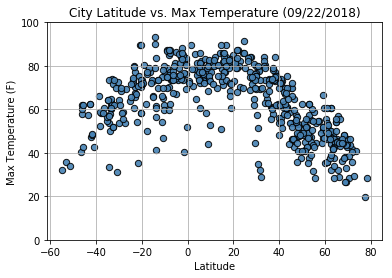

In [9]:
#sets up axis for scatter plot
lat_axis = weather_pd['Latitude']
max_axis = weather_pd['Max Temp']

#plots scatter plot
plt.scatter(lat_axis, max_axis, marker="o", facecolors="steelblue", edgecolors="black", s=40, alpha = .9)
plt.ylim(0, 100)
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("./lat_vs_temp.png")

#### Latitude vs. Humidity Plot

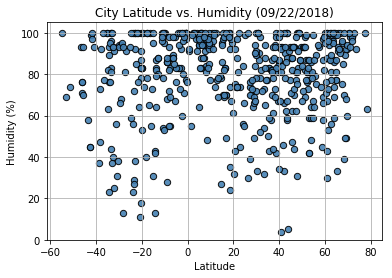

In [10]:
#sets up axis
hum_axis = weather_pd['Humidity']

#prints scatter plot
plt.scatter(lat_axis, hum_axis, marker="o", facecolors="steelblue", edgecolors="black", s=40, alpha = .9)
plt.ylim(0, 105)
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("./lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

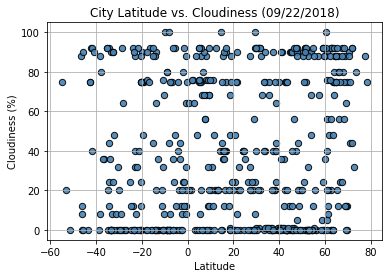

In [11]:
#sets up axis
cloud_axis = weather_pd['Cloudiness']

#prints scatter plot
plt.scatter(lat_axis, cloud_axis, marker="o", facecolors="steelblue", edgecolors="black", s=40, alpha = .9)
plt.ylim(-5, 105)
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("./lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

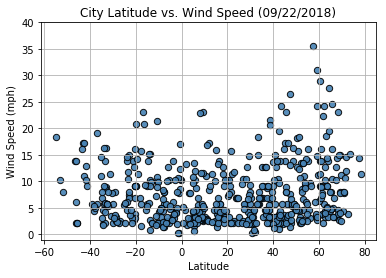

In [12]:
#sets up axis
wind_axis = weather_pd['Wind Speed']

#prints scatter plot
plt.scatter(lat_axis, wind_axis, marker="o", facecolors="steelblue", edgecolors="black", s=40, alpha = .9)
plt.ylim(-1, 40)
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("./lat_vs_wind_speed.png")